In [1]:
%cd D:\Pulpit\code\SudokuDeepNET
import torch
from torch.utils.data import DataLoader, random_split
from dataloader import SudokuDataset
from model import SudokuNet
from pipeline import ModelFit

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import seaborn as sns


d:\Pulpit\code\SudokuDeepNET\suenv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


D:\Pulpit\code\SudokuDeepNET


In [2]:
full_dataset = SudokuDataset("DataGeneration/data/data2.pt")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
print(f"Using device: {device}")
model = SudokuNet().to(device)


train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_ds, val_ds, test_ds = random_split(full_dataset, [train_size, val_size, test_size])
workers_num =5
        # Loaders
pin_memory_state = False
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True,pin_memory=pin_memory_state, num_workers=workers_num)
val_loader   = DataLoader(val_ds, batch_size=256, shuffle=False,pin_memory=pin_memory_state, num_workers=workers_num)
test_loader  = DataLoader(test_ds, batch_size=128, shuffle=False,pin_memory=pin_memory_state, num_workers=workers_num)



Using device: cpu


In [ ]:



model = SudokuNet()

        # Create trainer and get components
trainer = ModelFit()
model, optimizer, loss_func = trainer.get_model(
            learning_rate=1e-3, 
            model=model
        )

        # Train (using the returned optimizer and loss_func)
trainer.model_training(
            epoches=1,
            loss_func=loss_func,
            optimalizator=optimizer,  # Use the one returned by get_model
            training_data=train_loader,
            validation_data=val_loader,
            weight_unfreeze_epoch=None,
            scheduler_step_size=5,
            scheduler_gamma=0.5)
        


Epoch 1/1:  13%|█▎        | 812/6250 [02:10<13:59,  6.47it/s, train_loss=0.832]

In [33]:
test_ds.__getitem__(1)

(tensor([[[7., 9., 6., 0., 4., 3., 8., 0., 9.],
          [0., 2., 5., 7., 2., 9., 6., 0., 5.],
          [1., 4., 3., 1., 8., 5., 7., 1., 3.],
          [0., 0., 3., 5., 8., 2., 6., 3., 2.],
          [1., 6., 8., 6., 3., 9., 8., 9., 7.],
          [4., 7., 2., 1., 0., 4., 5., 1., 4.],
          [7., 3., 4., 7., 0., 5., 7., 4., 6.],
          [0., 1., 8., 3., 0., 8., 0., 5., 0.],
          [6., 5., 2., 1., 6., 4., 2., 0., 0.]]]),
 tensor([[6, 8, 5, 5, 3, 2, 7, 3, 8],
         [7, 1, 4, 6, 1, 8, 5, 1, 4],
         [0, 3, 2, 0, 7, 4, 6, 0, 2],
         [8, 4, 2, 4, 7, 1, 5, 2, 1],
         [0, 5, 7, 5, 2, 8, 7, 8, 6],
         [3, 6, 1, 0, 6, 3, 4, 0, 3],
         [6, 2, 3, 6, 8, 4, 6, 3, 5],
         [8, 0, 7, 2, 1, 7, 7, 4, 2],
         [5, 4, 1, 0, 5, 3, 1, 8, 0]]))

In [6]:
trainer.model_testing(test_loader,loss_func,class_names=9)

AttributeError: 'NoneType' object has no attribute 'eval'

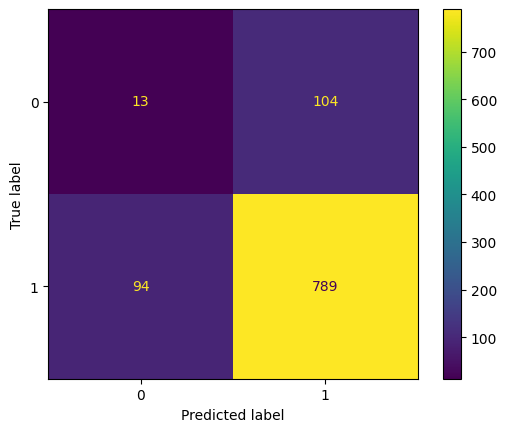

In [24]:
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

TypeError: 'numpy.ndarray' object is not callable